# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [54]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from ipywidgets import interact

import warnings
warnings.filterwarnings('ignore')

In [55]:
# Reading the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

## Load Data

In [56]:
# Reading the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [57]:
# Slicing for the mean number of housing units per year
housing_units = sfo_data[['housing_units']]

# Calculating the mean number of housing units per year
housing_units_mean = housing_units.groupby('year').mean()
housing_units_mean

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


In [58]:
# Saving the dataframe as a csv file
housing_units_mean.to_csv('housing_units_mean_file.csv')
# Renaming the housing_units column for better visuals
file_path1 = Path("housing_units_mean_file.csv")
housing_units_mean_df = pd.read_csv(file_path1, index_col="year")
housing_units_mean_df = housing_units_mean_df.rename(columns={"housing_units" : "Housing Units"})
housing_units_mean_df

,Housing Units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


In [59]:
# Using the Pandas plot function to plot the average housing units per year.
housing_units_mean_df.hvplot.bar(rot=90).opts(title='Housing Units in San Francisco from 2010 to 2016', yformatter='%.0f')


:Bars   [year]   (Housing Units)

In [60]:
# Using the min, max, and std to scale the y limits of the chart
housing_units_mean_df.hvplot.bar(
    ylim=[housing_units_mean_df["Housing Units"].min() - housing_units_mean_df["Housing Units"].std(), housing_units_mean_df["Housing Units"].max() + housing_units_mean_df["Housing Units"].std()],
    rot=90
).opts(title='Housing Units in San Francisco from 2010 to 2016', yformatter='%.0f')

:Bars   [year]   (Housing Units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [11]:
# Calculating the average sale price per square foot and average gross rent
sales_price_gross_rent = sfo_data[['sale_price_sqr_foot', 'gross_rent']]

# Calculating the mean number of housing units per year
sales_price_gross_rent_avg = sales_price_gross_rent.groupby('year').mean()
sales_price_gross_rent_avg = sales_price_gross_rent_avg.rename(columns={"sale_price_sqr_foot" : "Price per SqFt", "gross_rent" : "Gross Rent" })
sales_price_gross_rent_avg

,Price per SqFt,Gross Rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [12]:
# Creating two line charts, one to plot the average sale price per square foot and another for average montly rent
sales_price_df = sales_price_gross_rent_avg[['Price per SqFt']]
gross_rent_df = sales_price_gross_rent_avg[['Gross Rent']]

# Lining chart for average sale price per square foot
sales_price_plot = sales_price_df.hvplot().opts(title='Average Price per SqFt by Year', yformatter='%.0f', line_color='green')

# Lining chart for average montly rent
gross_rent_plot = gross_rent_df.hvplot().opts(title='Average Gross Rent by Year', yformatter='%.0f', line_color='purple')

# Displaying the charts
plots_as_column = pn.Column(
    "## Average Sale Price per Square Foot and Average Monthly Rent Charts", sales_price_plot, gross_rent_plot
)
plots_as_column

Column
    [0] Markdown(str)
    [1] HoloViews(Curve)
    [2] HoloViews(Curve)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [13]:
# Resetting the dataframe for interactive plotting.
sfo_data_mean_values = pd.DataFrame(
    sfo_data.groupby(
        ['year', 'neighborhood'])[['sale_price_sqr_foot', 'housing_units', 'gross_rent']].mean()
        ).reset_index()
sfo_data_mean_values = sfo_data_mean_values.rename(columns={"year" : "Year", "neighborhood" : "Neighborhood", "sale_price_sqr_foot" : "Price per SqFt", "housing_units": "Housing Units", "gross_rent" : "Gross Rent" })
sfo_data_mean_values.head()


,Year,Neighborhood,Price per SqFt,Housing Units,Gross Rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [30]:
# Using hvplot to create an interactive line chart of the average price per sq ft.
def plot_by_gross_rent():
   
    return sfo_data_mean_values.hvplot(
        x="Year",
        y="Price per SqFt",
        title="Neighborhood",
        groupby="Neighborhood"
    )
plot_by_gross_rent()

:DynamicMap   [Neighborhood]
   :Curve   [Year]   (Price per SqFt)

In [110]:
# Using hvplot to create an interactive line chart of the average monthly rent.
def plot_by_gross_rent():
   
    return sfo_data_mean_values.hvplot(
        x="Year",
        y="Gross Rent",
        title="Neighborhood",
        groupby="Neighborhood"
    )
plot_by_gross_rent()

:DynamicMap   [Neighborhood]
   :Curve   [Year]   (Gross Rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [16]:
# Getting the data from the top 10 expensive neighborhoods to own
sfo_data_sales_price_avg = sfo_data.groupby('neighborhood').mean().reset_index()
sfo_top = sfo_data_sales_price_avg.sort_values('sale_price_sqr_foot', ascending=False)
sfo_top_ten = sfo_top.iloc[:10, 0:2]
sfo_top_ten_df = (
    sfo_top_ten
    .rename(
        columns={
            "neighborhood" : "Neighborhood",
            "sale_price_sqr_foot" : "Price per SqFt"
        })
    .set_index('Neighborhood')
)

sfo_top_ten_df

,Price per SqFt
Neighborhood,
Union Square District,903.993258
Merced Heights,788.844818
Miraloma Park,779.810842
Pacific Heights,689.555817
Westwood Park,687.087575
Telegraph Hill,676.506578
Presidio Heights,675.350212
Cow Hollow,665.964042
Potrero Hill,662.013613


In [17]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_top_ten_df.hvplot.bar(rot=90).opts(title='Top 10 Expensive Neighborhoods in SFO', yformatter='%.0f')

:Bars   [Neighborhood]   (Price per SqFt)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [81]:
# Fetching the previously generated DataFrame that was gro
sfo_data_mean_values.head()


,Year,Neighborhood,Price per SqFt,Housing Units,Gross Rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [80]:
# Plotting the data from the top 10 expensive neighborhoods
def plot_by_gross_rent():
   
    return sfo_data_mean_values.hvplot.bar(
        x="Year",
        y=["Price per SqFt", "Gross Rent"], 
        title="Neighborhood",
        groupby="Neighborhood",
        rot=90
    )
plot_by_gross_rent()

:DynamicMap   [Neighborhood]
   :Bars   [Year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [20]:
# Load neighborhoods coordinates data
neighborhood_coordinates_df = pd.read_csv(Path('./Data/neighborhoods_coordinates.csv'))
neighborhood_coordinates_df = neighborhood_coordinates_df.set_index("Neighborhood")
neighborhood_coordinates_df.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [21]:
# Calculate the mean values for each neighborhood
neighborhood_df_mean = sfo_data_mean_values.groupby('Neighborhood').mean()
neighborhood_df_mean = neighborhood_df_mean.drop(columns=['Year'])
neighborhood_df_mean.head()

,Price per SqFt,Housing Units,Gross Rent
Neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [22]:
# Join the average values with the neighborhood locations
neighborhood_joined = pd.concat([neighborhood_coordinates_df, neighborhood_df_mean], join='inner', axis=1)
neighborhood_joined.head()

,Lat,Lon,Price per SqFt,Housing Units,Gross Rent
Neighborhood,,,,,
Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

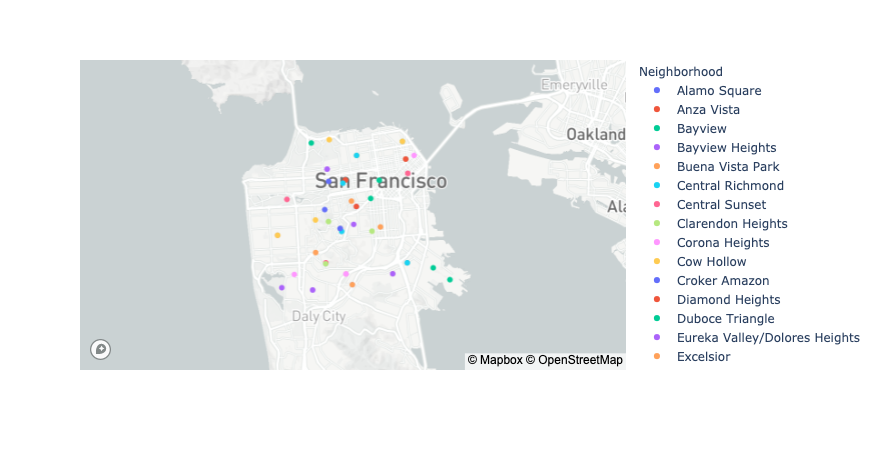

In [83]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_1 = px.scatter_mapbox(
    neighborhood_joined,
    lat="Lat",
    lon="Lon",
    color=neighborhood_joined.index,
    zoom=10
)
map_1.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [89]:
# Fetching the data from all expensive neighborhoods per year.
top_10 = sfo_data_mean_values.sort_values('Price per SqFt', ascending=False).head(10)
top_10

,Year,Neighborhood,Price per SqFt,Housing Units,Gross Rent
346,2015,Union Square District,2258.702832,382295,3739
388,2016,Presidio Heights,1465.968586,384242,4390
374,2016,Merced Heights,1416.666667,384242,4390
226,2013,Union Square District,1290.472107,378401,2971
262,2014,Miraloma Park,1267.766203,380348,3528
386,2016,Parnassus/Ashbury Heights,1207.997485,384242,4390
382,2016,Outer Richmond,1196.645437,384242,4390
323,2015,Marina,1132.837361,382295,3739
282,2014,South of Market,1119.838877,380348,3528
300,2015,Corona Heights,1100.791194,382295,3739


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


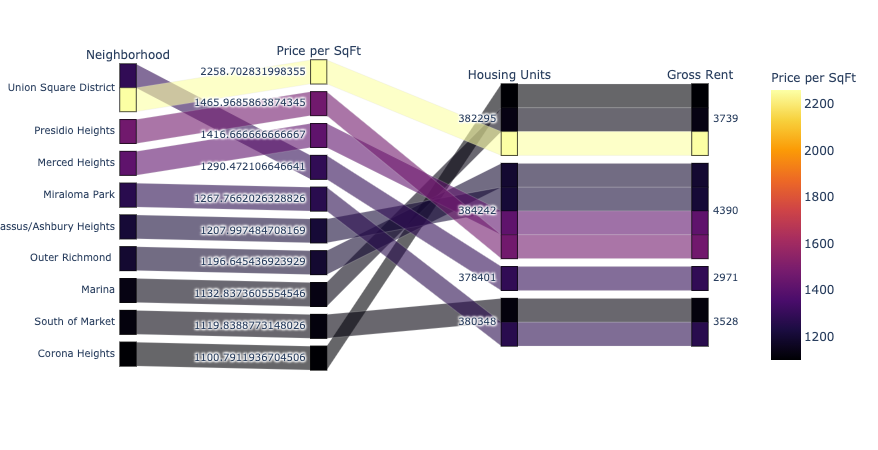

In [94]:
# Parallel Categories Plot
px.parallel_categories(
    top_10,
    dimensions=["Neighborhood", "Price per SqFt", "Housing Units", "Gross Rent"],
    color_continuous_scale=px.colors.sequential.Inferno,
    color="Price per SqFt"
)

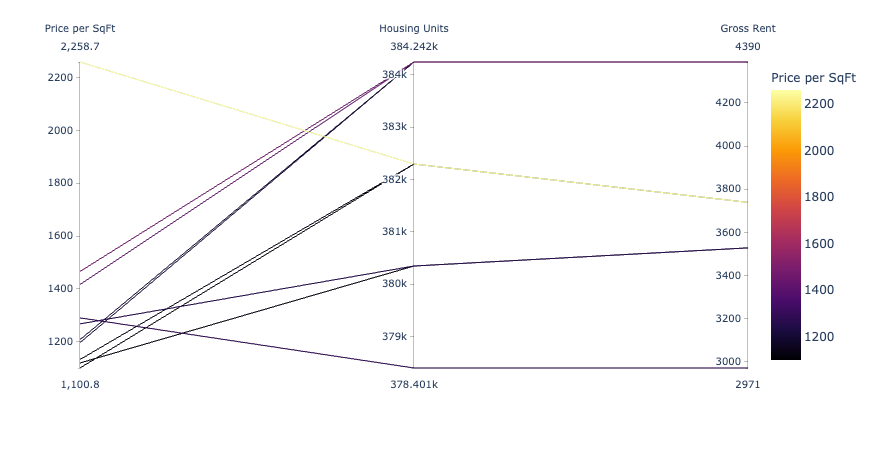

In [93]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    top_10,
    dimensions=["Neighborhood", "Price per SqFt", "Housing Units", "Gross Rent"],
    color_continuous_scale=px.colors.sequential.Inferno,
    color="Price per SqFt"
)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [107]:
# Sunburst Plot
#px.sunburst(
#    top_10,
#    path=['Year', 'Neighborhood'],
#    values='Gross Rent'
#)